In [1]:
import pickle
import numpy as np


class ReplayBuffer:
    
	def restore(self, filename):
		with open(filename, 'rb') as f:
			save_dict = pickle.load(f)
		self.data = save_dict['data']
		self.size = save_dict['size']
		self._traj_counter = save_dict['_traj_counter']
		self._start = save_dict['_start']
		self.traj_bounds = save_dict['traj_bounds']
  
buffer = ReplayBuffer()


In [2]:
buffer.restore('/data0/zh1/dsrl/dsrl_label-dsrl_task_id-5_task_suite-libero_object_max_timesteps-400_kl_coeff-0.0_G0_2025_09_10_06_46_46_0000--s-42/replay_buffer_300000.pkl')

In [3]:
# print detail of buffer
print(f'Buffer size: {buffer.size}')
print(f'Trajectory counter: {buffer._traj_counter}')
print(f'Start index: {buffer._start}')
print(f'Trajectory bounds: {buffer.traj_bounds}')
print(f'Keys in data: {list(buffer.data.keys())}')

task_details = {}

for k,v in buffer.traj_bounds.items():
	task_details[k] = {
		'start_idx': v[0],
		'end_idx': v[1]-1,
	}

Buffer size: 15000
Trajectory counter: 2362
Start index: 15000
Trajectory bounds: {0: (0, 20), 1: (20, 40), 2: (40, 60), 3: (60, 80), 4: (80, 100), 5: (100, 120), 6: (120, 140), 7: (140, 160), 8: (160, 180), 9: (180, 200), 10: (200, 220), 11: (220, 240), 12: (240, 260), 13: (260, 280), 14: (280, 300), 15: (300, 320), 16: (320, 340), 17: (340, 360), 18: (360, 380), 19: (380, 400), 20: (400, 420), 21: (420, 440), 22: (440, 460), 23: (460, 480), 24: (480, 500), 25: (500, 520), 26: (520, 540), 27: (540, 560), 28: (560, 567), 29: (567, 587), 30: (587, 607), 31: (607, 627), 32: (627, 647), 33: (647, 667), 34: (667, 687), 35: (687, 707), 36: (707, 727), 37: (727, 747), 38: (747, 767), 39: (767, 787), 40: (787, 807), 41: (807, 827), 42: (827, 847), 43: (847, 867), 44: (867, 887), 45: (887, 907), 46: (907, 927), 47: (927, 947), 48: (947, 967), 49: (967, 987), 50: (987, 993), 51: (993, 1000), 52: (1000, 1020), 53: (1020, 1039), 54: (1039, 1046), 55: (1046, 1053), 56: (1053, 1061), 57: (1061, 108

Observation shape: (25000, 64, 64, 3, 1)


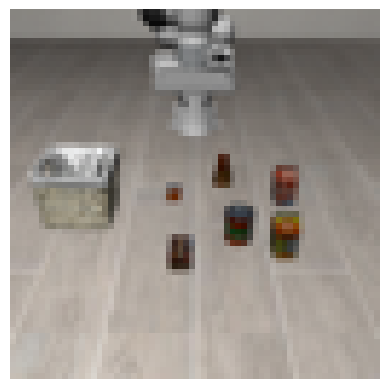

In [4]:
# visualize observations
import matplotlib.pyplot as plt
obs = buffer.data['observations']['pixels']
print(f'Observation shape: {obs.shape}')  # (num_samples, height, width, channels, 1)

# Visualize the first 5 observations
for i in range(1):
	plt.imshow(obs[i, :, :, :, 0])
	plt.axis('off')
	plt.show()

In [5]:
# print rewards
rewards = buffer.data['rewards'][:buffer.size]
print(f'Rewards shape: {rewards.shape}')  # (num_samples, )

for k, v in task_details.items():
	task_details[k]['is_success'] = rewards[v['end_idx']] > -0.5


Rewards shape: (15000,)


In [12]:
# print actions
actions = buffer.data['actions'][:buffer.size].squeeze(1)[:2000]
print(f'Actions shape: {actions.shape}')  # (num_samples, action_dim)

# for k, v in task_details.items():
# 	task_details[k]['actions'] = actions[v['start_idx']:v['end_idx']+1]
# 	task_details[k]['num_actions'] = len(task_details[k]['actions'])
# 	print(f"Task {k}: Number of actions = {task_details[k]['num_actions']}")

action_max = actions.max(axis=0)
action_min = actions.min(axis=0)
action_mean = actions.mean(axis=0)
action_std = actions.std(axis=0)
print(f'Action max: {action_max}')
print(f'Action min: {action_min}')
print(f'Action mean: {action_mean}')
print(f'Action std: {action_std}')
 
 

Actions shape: (2000, 32)
Action max: [2.72153   2.6651924 3.4908185 3.8344736 3.219467  3.2274978 3.441243
 2.6724517 2.8512928 2.940302  2.6439729 2.9740047 3.1317358 3.2332866
 2.600616  2.5438707 3.027318  3.0473354 4.0533633 3.4144382 2.4405754
 2.8153276 2.880207  2.7964523 3.0612233 2.8401384 2.9417489 3.0612233
 2.8437655 3.5100987 2.8718345 3.1050804]
Action min: [-3.2203476 -2.8171175 -2.8285184 -3.0079346 -3.4185858 -3.4688654
 -2.6461914 -3.0061195 -2.9610543 -3.0516326 -3.0744905 -4.7127643
 -3.1783595 -2.9112208 -2.966754  -3.2447667 -3.1258078 -3.27408
 -3.2619343 -3.3201776 -3.0689692 -3.510311  -3.2207687 -3.2297754
 -3.4591    -3.9143107 -3.1031408 -3.0408356 -2.6716726 -3.1178029
 -3.1063595 -3.5060914]
Action mean: [ 0.08232471 -0.2893597  -0.1371693   0.14351825  0.13283357  0.11083198
 -0.14745578 -0.10244992 -0.01837514  0.15182008 -0.01806402 -0.15177959
  0.10321701  0.0906893  -0.17055301 -0.06832893 -0.02008047  0.04205071
 -0.02273146  0.0054842  -0.08983046

In [88]:
# print structure of task_details, with keys and shapes and types
for k, v in task_details.items():
	print(f"Episode {k}:")
	for key, value in v.items():
		if isinstance(value, np.ndarray):
			print(f"  {key}: shape = {value.shape}, dtype = {value.dtype}")
		else:
			print(f"  {key}: value = {value}, type = {type(value)}")

Episode 0:
  start_idx: value = 0, type = <class 'int'>
  end_idx: value = 19, type = <class 'int'>
  is_success: value = False, type = <class 'numpy.bool'>
  actions: shape = (20, 32), dtype = float32
  num_actions: value = 20, type = <class 'int'>
Episode 1:
  start_idx: value = 20, type = <class 'int'>
  end_idx: value = 39, type = <class 'int'>
  is_success: value = False, type = <class 'numpy.bool'>
  actions: shape = (20, 32), dtype = float32
  num_actions: value = 20, type = <class 'int'>
Episode 2:
  start_idx: value = 40, type = <class 'int'>
  end_idx: value = 59, type = <class 'int'>
  is_success: value = False, type = <class 'numpy.bool'>
  actions: shape = (20, 32), dtype = float32
  num_actions: value = 20, type = <class 'int'>
Episode 3:
  start_idx: value = 60, type = <class 'int'>
  end_idx: value = 79, type = <class 'int'>
  is_success: value = False, type = <class 'numpy.bool'>
  actions: shape = (20, 32), dtype = float32
  num_actions: value = 20, type = <class 'int


===== Episode 2361 =====
shape: (5, 32)
global min=-0.974, max=0.971
global mean=-0.045, std=0.550
per-dim mean: [ 0.481  0.095 -0.518 -0.03  -0.238  0.089  0.116 -0.188 -0.486 -0.27
  0.086 -0.096 -0.055  0.329  0.237 -0.058 -0.396 -0.189 -0.31  -0.025
 -0.087 -0.184 -0.062 -0.142  0.035  0.105  0.413  0.2   -0.272 -0.286
  0.048  0.205]
per-dim std : [0.689 0.654 0.433 0.577 0.426 0.504 0.514 0.387 0.262 0.473 0.585 0.625
 0.462 0.677 0.142 0.628 0.492 0.497 0.476 0.288 0.527 0.434 0.421 0.663
 0.491 0.493 0.408 0.55  0.306 0.69  0.159 0.232]


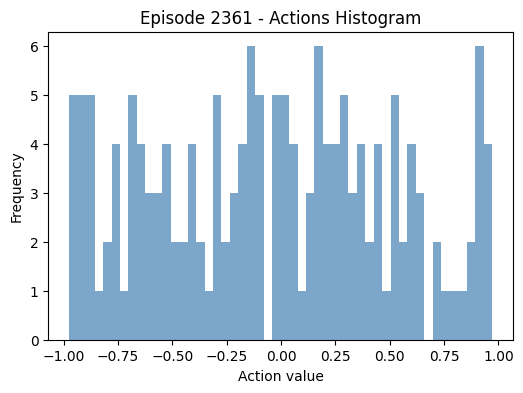

/tmp/ipykernel_3358270/1346324890.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(actions, labels=[str(i) for i in range(D)], showfliers=False)


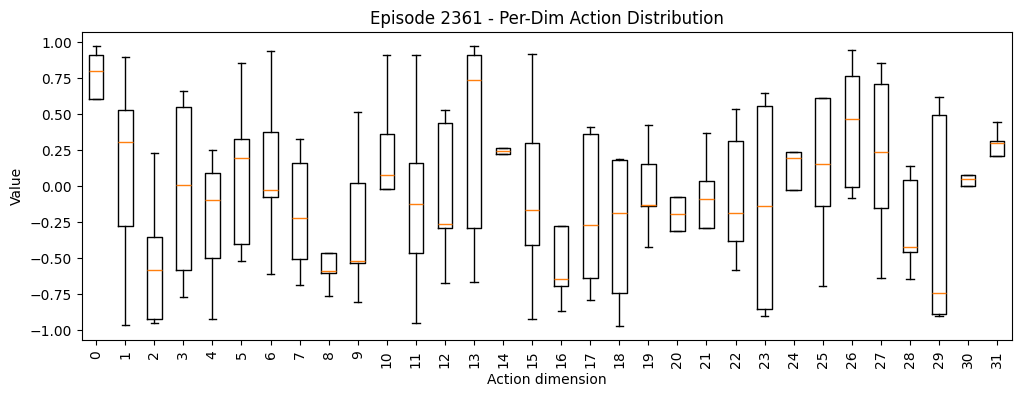


===== Episode 2360 =====
shape: (5, 32)
global min=-0.980, max=0.991
global mean=0.028, std=0.546
per-dim mean: [ 0.284  0.14  -0.535 -0.021 -0.237  0.196  0.433 -0.02  -0.021 -0.01
  0.257  0.234  0.038  0.068 -0.126 -0.162  0.038 -0.028 -0.248  0.026
 -0.386 -0.242  0.159  0.276  0.082 -0.02   0.196  0.219 -0.196  0.061
  0.205  0.223]
per-dim std : [0.64  0.686 0.572 0.474 0.357 0.483 0.232 0.751 0.221 0.563 0.685 0.399
 0.33  0.687 0.516 0.482 0.594 0.427 0.504 0.294 0.363 0.548 0.494 0.619
 0.43  0.494 0.476 0.514 0.234 0.571 0.46  0.459]


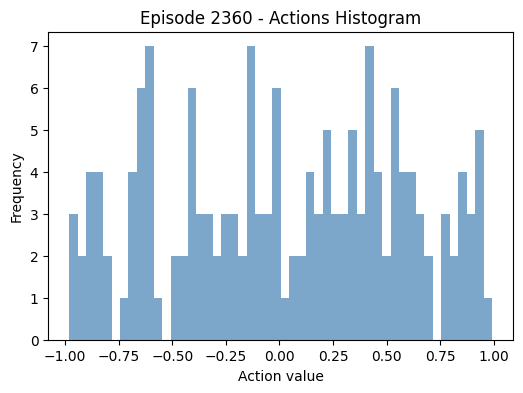

/tmp/ipykernel_3358270/1346324890.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(actions, labels=[str(i) for i in range(D)], showfliers=False)


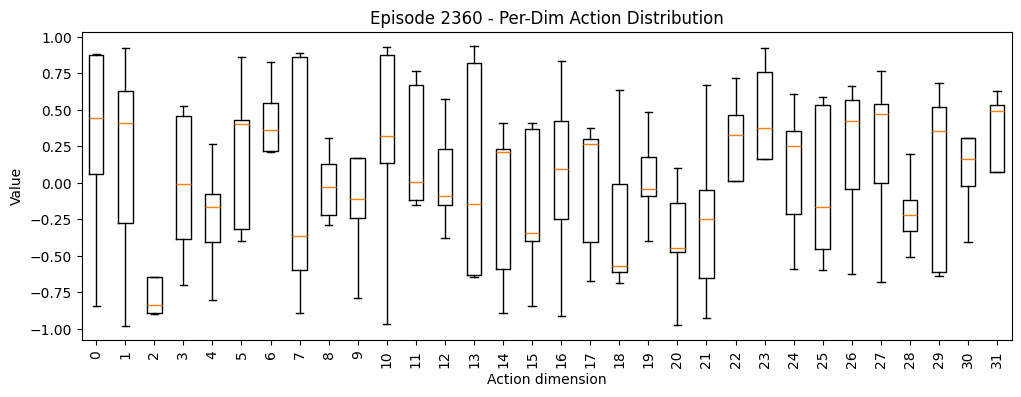


===== Episode 2359 =====
shape: (5, 32)
global min=-0.987, max=0.956
global mean=-0.026, std=0.511
per-dim mean: [ 0.272  0.134 -0.692  0.165 -0.329  0.035  0.354 -0.122 -0.32  -0.226
 -0.129  0.271 -0.092  0.001 -0.023  0.033 -0.507  0.038  0.182  0.133
 -0.168  0.071 -0.047  0.017 -0.058 -0.004  0.258  0.301 -0.352 -0.13
 -0.103  0.198]
per-dim std : [0.63  0.608 0.442 0.457 0.513 0.239 0.666 0.345 0.42  0.268 0.527 0.391
 0.392 0.532 0.43  0.486 0.375 0.314 0.337 0.49  0.427 0.517 0.565 0.417
 0.282 0.518 0.278 0.515 0.212 0.508 0.483 0.484]


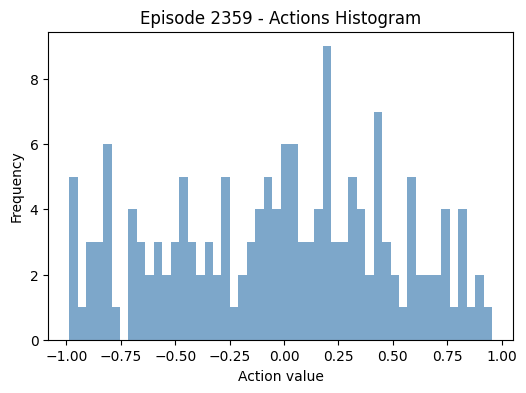

/tmp/ipykernel_3358270/1346324890.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(actions, labels=[str(i) for i in range(D)], showfliers=False)


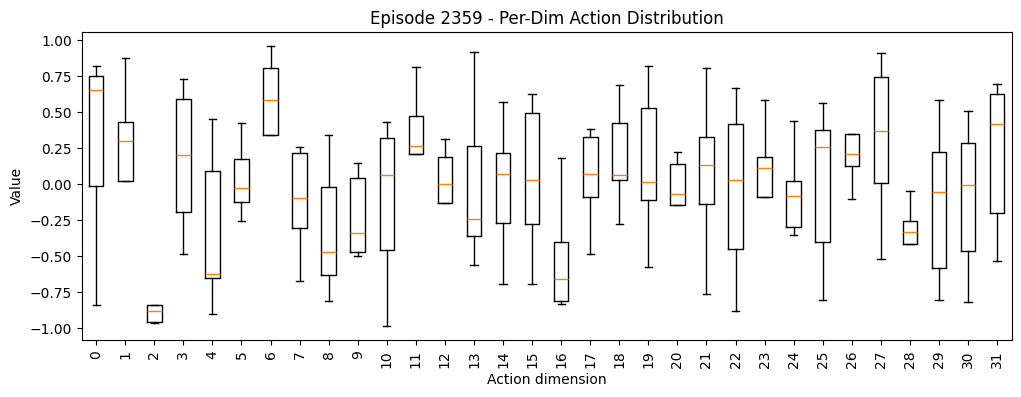

In [89]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_actions(task_details, plot=True):
    """
    分析每个 episode 的 actions 数值分布
    
    参数:
        task_details: dict, 存有 episode 的数据
        plot: 是否画图（直方图和箱线图）
    """
    for ep_id, ep_data in task_details.items():
        actions = ep_data["actions"]  # (T, D)
        T, D = actions.shape

        # 统计信息
        min_val = actions.min()
        max_val = actions.max()
        mean_val = actions.mean()
        std_val = actions.std()
        
        mean_per_dim = actions.mean(axis=0)  # (D,)
        std_per_dim = actions.std(axis=0)    # (D,)

        print(f"\n===== Episode {ep_id} =====")
        print(f"shape: {actions.shape}")
        print(f"global min={min_val:.3f}, max={max_val:.3f}")
        print(f"global mean={mean_val:.3f}, std={std_val:.3f}")
        print(f"per-dim mean: {np.round(mean_per_dim, 3)}")
        print(f"per-dim std : {np.round(std_per_dim, 3)}")

        if plot:
            # 全局直方图
            plt.figure(figsize=(6,4))
            plt.hist(actions.flatten(), bins=50, alpha=0.7, color="steelblue")
            plt.title(f"Episode {ep_id} - Actions Histogram")
            plt.xlabel("Action value")
            plt.ylabel("Frequency")
            plt.show()

            # 每一维的箱线图
            plt.figure(figsize=(12,4))
            plt.boxplot(actions, labels=[str(i) for i in range(D)], showfliers=False)
            plt.title(f"Episode {ep_id} - Per-Dim Action Distribution")
            plt.xlabel("Action dimension")
            plt.ylabel("Value")
            plt.xticks(rotation=90)
            plt.show()

# reverse the task_details to show first 50 episodes
task_details_rev = {k: task_details[k] for k in sorted(task_details.keys(), reverse=True)[:3]}
analyze_actions(task_details_rev, plot=True)

Plotting 10 episodes, min length = 5, action dim = 32


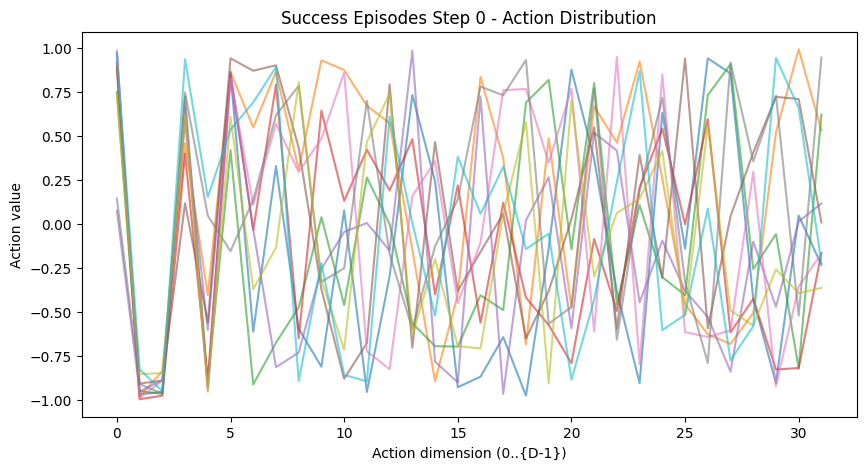

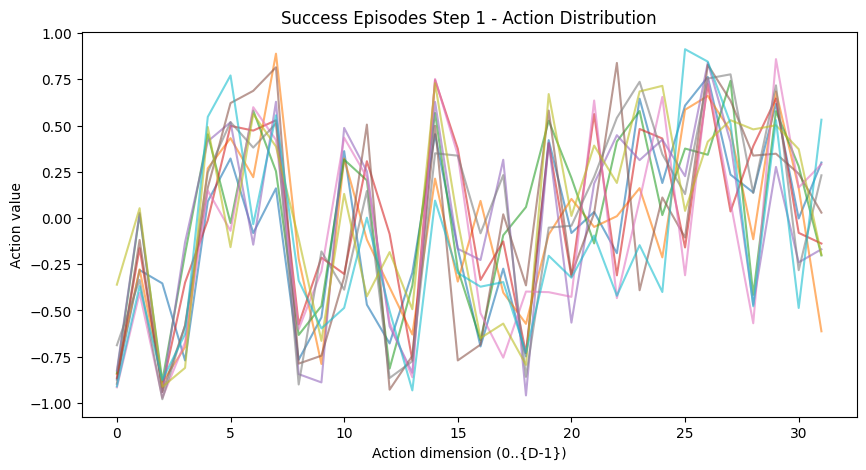

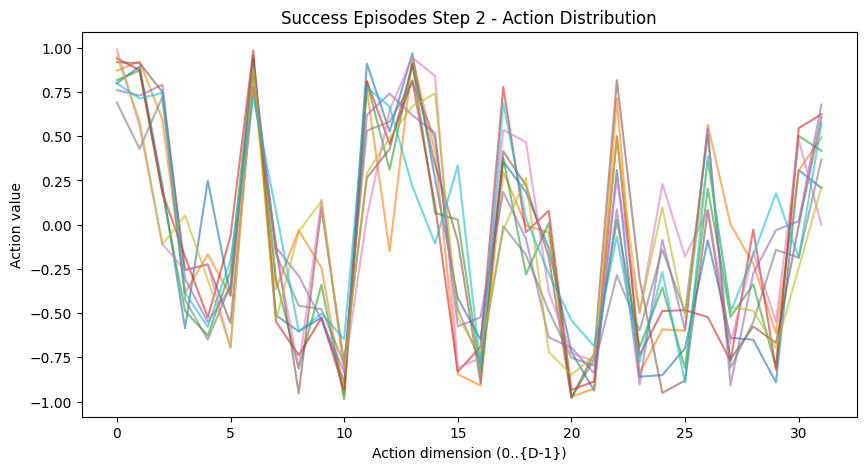

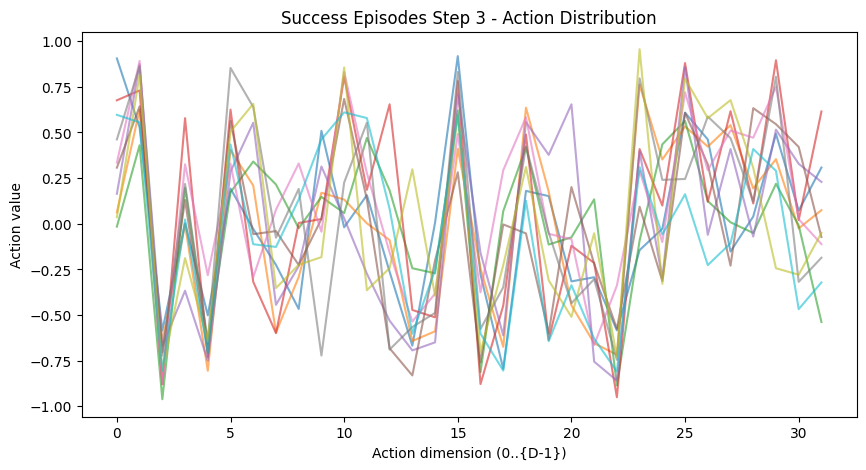

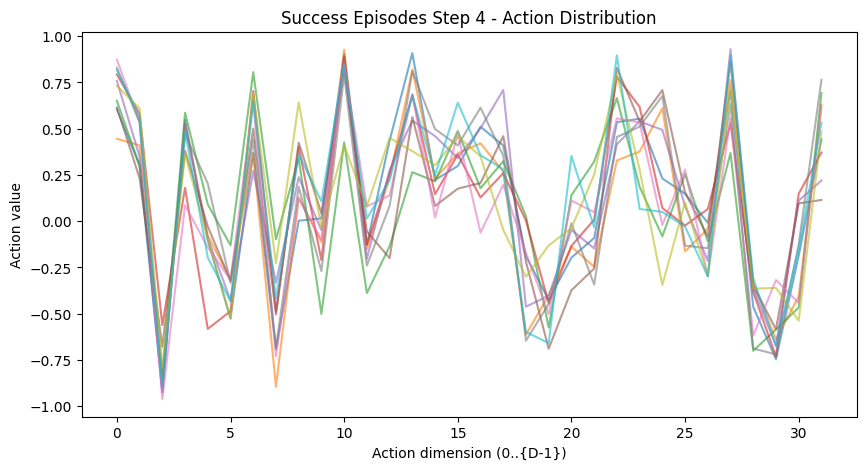

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def plot_actions_by_step(episodes, title_prefix=""):
    """
    给定一批 episode 数据，每次取同一个 step (n)，
    把该 step 的 32 维 action 画在一张图上。
    
    参数:
        episodes: dict[int, dict]，筛选好的 episodes
        title_prefix: str，可选，图标题前缀
    """
    if not episodes:
        print("No episodes provided!")
        return
    
    # 找最短长度
    min_T = min(ep["actions"].shape[0] for ep in episodes.values())
    D = next(iter(episodes.values()))["actions"].shape[1]

    print(f"Plotting {len(episodes)} episodes, min length = {min_T}, action dim = {D}")

    for n in range(min_T):  # 遍历每个 step
        plt.figure(figsize=(10,5))
        for ep_id, ep_data in episodes.items():
            actions = ep_data["actions"]  # (T, D)
            action_n = actions[n]  # (D,)
            plt.plot(range(D), action_n, alpha=0.6, label=f"Ep {ep_id}")
        
        plt.title(f"{title_prefix} Step {n} - Action Distribution")
        plt.xlabel("Action dimension (0..{D-1})")
        plt.ylabel("Action value")
        # plt.legend()  # 如果 episode 太多可以注释掉
        plt.show()


# 按 key 排序（假设 key 就是 episode id）
sorted_eps = sorted(task_details.keys(), reverse=True)

# 筛选出成功的
success_eps = [k for k in sorted_eps if task_details[k]["is_success"]]

# 取最后 50 个成功的
last50_success_eps = {k: task_details[k] for k in success_eps[0:10]}

# 画图
plot_actions_by_step(last50_success_eps, title_prefix="Success Episodes")


Plotting 5 episodes, min length = 6, action dim = 32


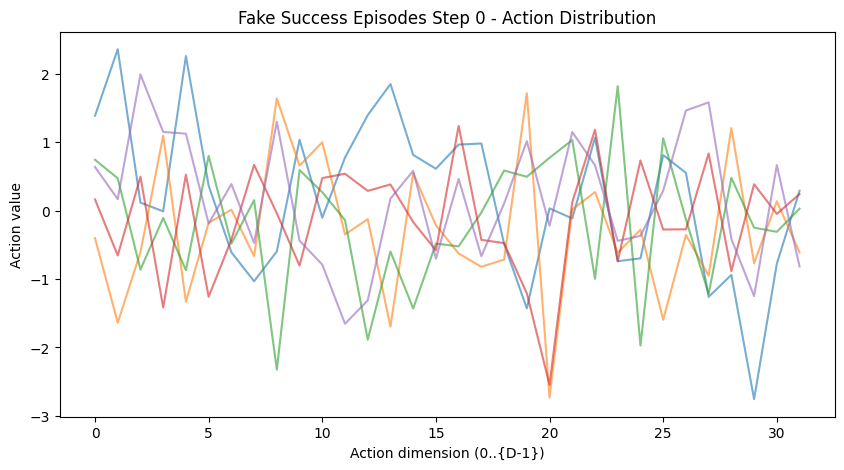

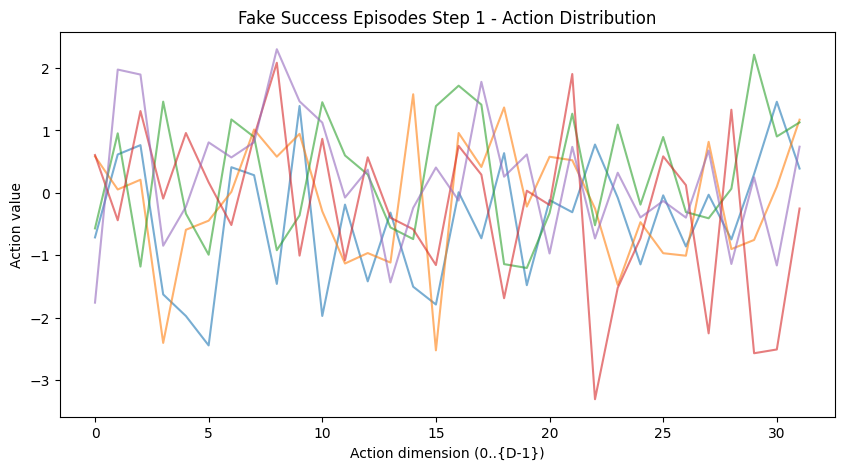

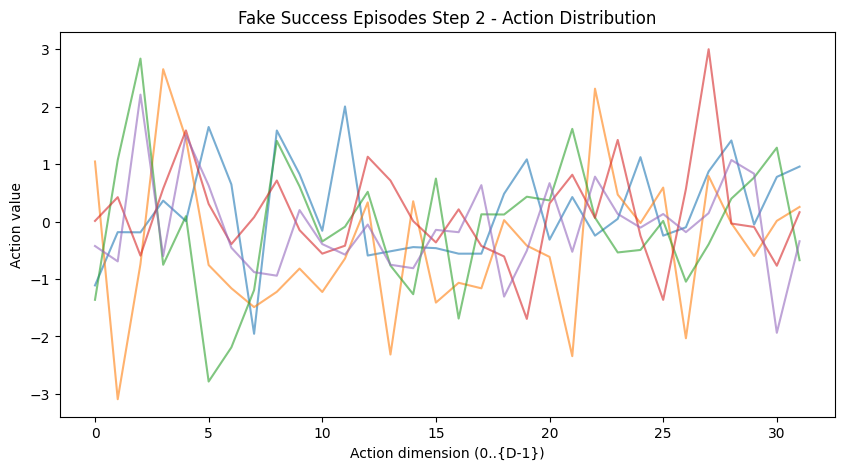

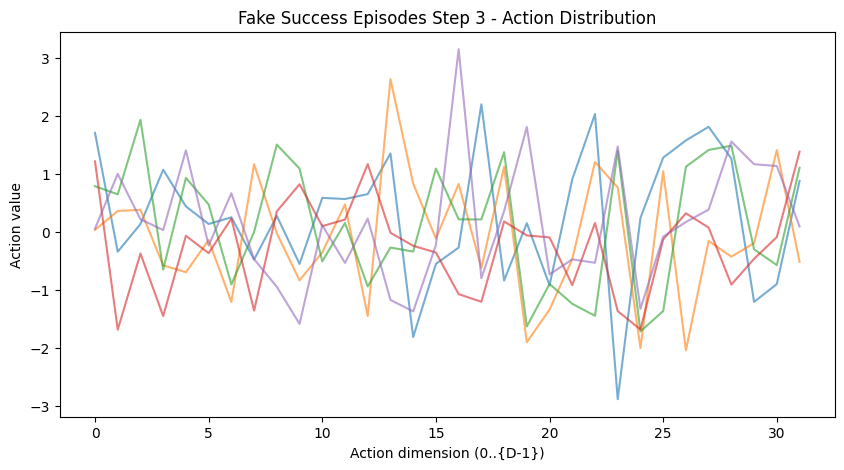

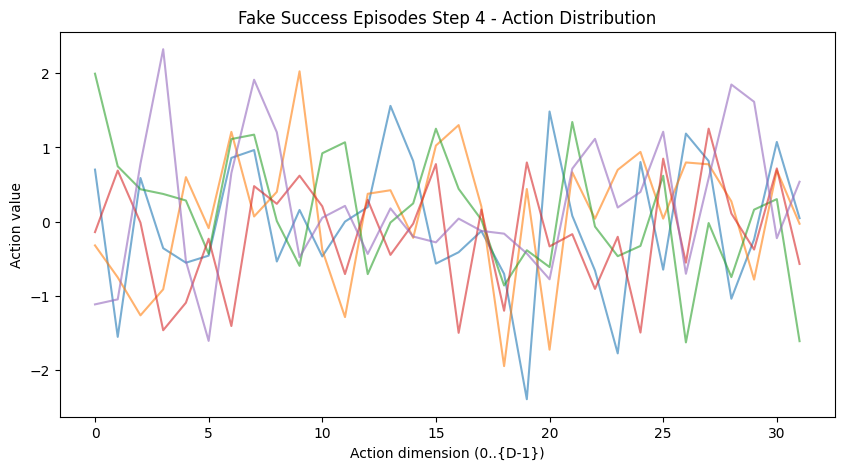

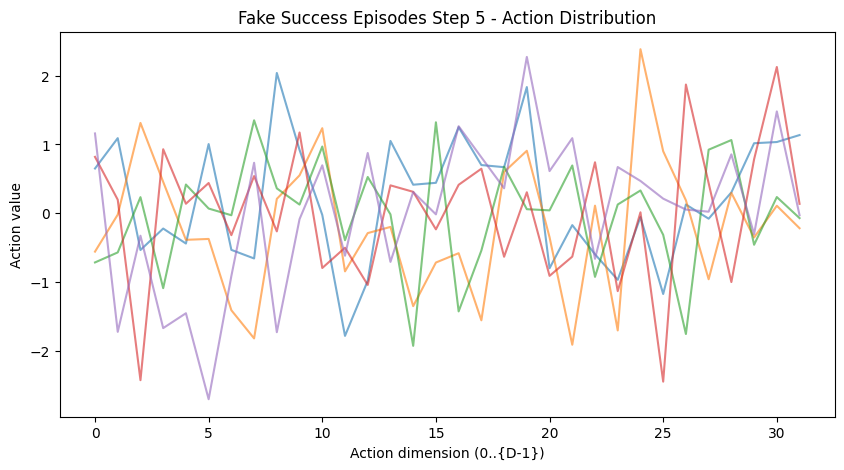

In [91]:
import numpy as np
import random

# 假设生成 60 个 episode，每个长度在 [15, 25] 之间，动作维度 32
def generate_fake_task_details(num_eps=5, min_len=5, max_len=10, dim=32):
    task_details = {}
    for ep_id in range(num_eps):
        T = random.randint(min_len, max_len)  # 每个 episode 长度随机
        actions = np.random.randn(T, dim).astype(np.float32)  # N(0,1)
        task_details[ep_id] = {
            "actions": actions,
            "is_success": True,
            "start_idx": 0,
            "end_idx": T - 1,
            "num_actions": T,
        }
    return task_details

# 生成数据
fake_task_details = generate_fake_task_details()

# 筛选最后 50 个成功的 episode
sorted_eps = sorted(fake_task_details.keys(), reverse=True)
success_eps = [k for k in sorted_eps if fake_task_details[k]["is_success"]]
last50_success_eps = {k: fake_task_details[k] for k in success_eps[:50]}

# 可视化
plot_actions_by_step(last50_success_eps, title_prefix="Fake Success Episodes")


In [92]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_actions_ac_level(task_details, plot=True):
    """
    分析每个 episode 的 actions 数值分布
    """
    for ep_id, ep_data in task_details.items():
        actions = ep_data["actions"]  # (T, D)
        T, D = actions.shape

        # 全局统计
        min_val = actions.min()
        max_val = actions.max()
        mean_val = actions.mean()
        std_val = actions.std()
        
        # 在 32 维 action 上取均值（每个 step 的均值和方差）
        mean_per_step = actions.mean(axis=1)  # (T,)
        std_per_step  = actions.std(axis=1)   # (T,)

        print(f"\n===== Episode {ep_id} =====")
        print(f"shape: {actions.shape}")
        print(f"global min={min_val:.3f}, max={max_val:.3f}")
        print(f"global mean={mean_val:.3f}, std={std_val:.3f}")
        print(f"mean per step: {np.round(mean_per_step, 3)}")
        print(f"std  per step: {np.round(std_per_step, 3)}")

        if plot:
            # step 级别均值曲线
            plt.figure(figsize=(6,4))
            plt.plot(mean_per_step, label="mean per step")
            plt.fill_between(range(T), mean_per_step-std_per_step, mean_per_step+std_per_step,
                             color="lightblue", alpha=0.5, label="±1 std")
            plt.title(f"Episode {ep_id} - Mean across 32 actions")
            plt.xlabel("Timestep")
            plt.ylabel("Value")
            plt.legend()
            plt.show()
            
# analyze_actions_ac_level(task_details, plot=True)


In [93]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_actions_global(task_details, plot=True):
    """
    全局对比 success vs fail 的 actions 分布
    """
    success_actions = []
    fail_actions = []

    for ep_id, ep_data in task_details.items():
        actions = ep_data["actions"]  # (T, D)
        if ep_data["is_success"]:
            success_actions.append(actions)
        else:
            fail_actions.append(actions)

    # 拼接
    success_actions = np.concatenate(success_actions, axis=0) if success_actions else np.array([])
    fail_actions    = np.concatenate(fail_actions, axis=0) if fail_actions else np.array([])

    print("\n===== Overall Buffer Statistics =====")
    if success_actions.size > 0:
        print(f"Success group: shape={success_actions.shape}, "
              f"mean={success_actions.mean():.3f}, std={success_actions.std():.3f}, "
              f"min={success_actions.min():.3f}, max={success_actions.max():.3f}")
    else:
        print("Success group: empty")

    if fail_actions.size > 0:
        print(f"Fail group: shape={fail_actions.shape}, "
              f"mean={fail_actions.mean():.3f}, std={fail_actions.std():.3f}, "
              f"min={fail_actions.min():.3f}, max={fail_actions.max():.3f}")
    else:
        print("Fail group: empty")

    # =========================
    # 画图
    # =========================
    if plot and success_actions.size > 0 and fail_actions.size > 0:
        # 直方图对比 success vs fail
        plt.figure(figsize=(6,4))
        plt.hist(success_actions.flatten(), bins=50, alpha=0.6, label="Success", color="green")
        plt.hist(fail_actions.flatten(), bins=50, alpha=0.6, label="Fail", color="red")
        plt.title("Overall Actions Distribution (Success vs Fail)")
        plt.xlabel("Action value")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()

        # per-dim 对比
        mean_success = success_actions.mean(axis=0)  # (D,)
        mean_fail    = fail_actions.mean(axis=0)     # (D,)
        std_success  = success_actions.std(axis=0)   # (D,)
        std_fail     = fail_actions.std(axis=0)      # (D,)

        dims = np.arange(len(mean_success))
        bar_width = 0.35

        plt.figure(figsize=(12,5))
        plt.bar(dims - bar_width/2, mean_success, yerr=std_success,
                width=bar_width, label="Success", alpha=0.7, color="green", capsize=3)
        plt.bar(dims + bar_width/2, mean_fail, yerr=std_fail,
                width=bar_width, label="Fail", alpha=0.7, color="red", capsize=3)

        plt.title("Per-Dimension Mean (±std) - Success vs Fail")
        plt.xlabel("Action dimension")
        plt.ylabel("Value")
        plt.xticks(dims)
        plt.legend()
        plt.show()
# analyze_actions_global(task_details, plot=True)